In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
### Plot of this random linear looking data  

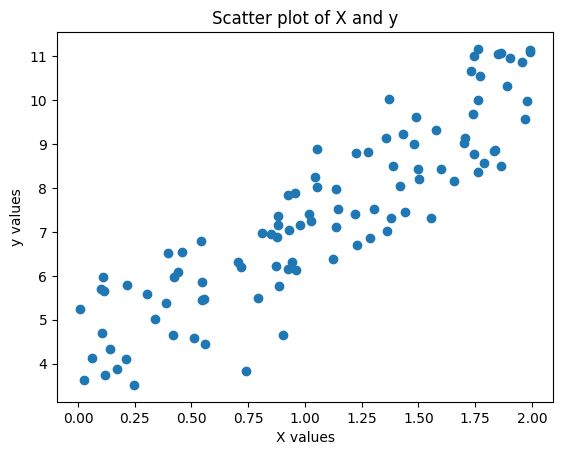

In [4]:
plt.scatter(X,y)
plt.title('Scatter plot of X and y')
plt.xlabel('X values')
plt.ylabel('y values')
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.08345326],
       [3.08751174]])

In [7]:
### We can now make predictions using theta-hat

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.08345326],
       [10.25847673]])

In [9]:
### Plot of model`s prediction

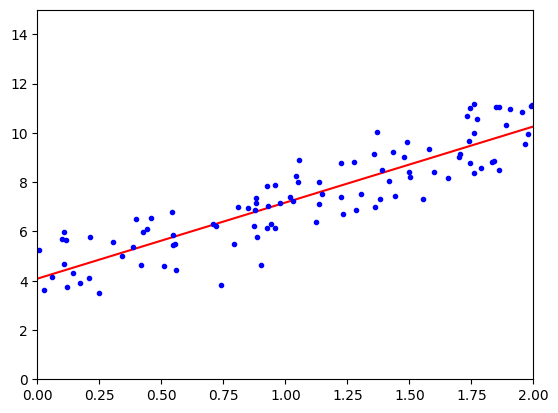

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
### Performing Linear Regression with Scikit-Learn

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.08345326],
       [10.25847673]])

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.08345326],
       [3.08751174]])

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.08345326],
       [3.08751174]])

In [15]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.08345326],
       [3.08751174]])

In [16]:
### SGD using simple learning schedule

In [17]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.1155103 ],
       [3.10615077]])

In [18]:
### Implementing Linear Regression with SGD

In [19]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1115569]), array([3.11646467]))

In [20]:
### Polynomial Regression

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

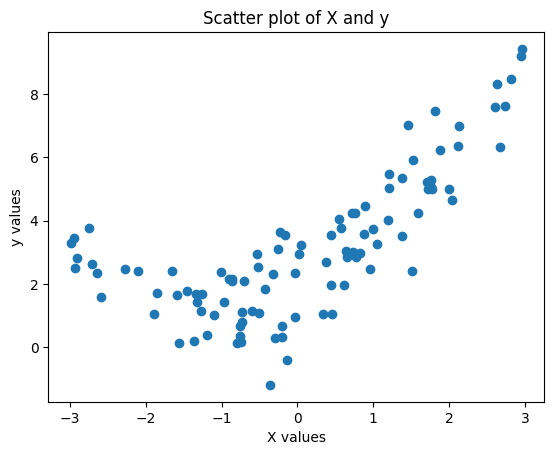

In [22]:
plt.scatter(X,y)
plt.title('Scatter plot of X and y')
plt.xlabel('X values')
plt.ylabel('y values')
plt.show()

In [23]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], 'X[0]')
print(X_poly[0], 'X_poly[0]')

[-1.19169291] X[0]
[-1.19169291  1.42013198] X_poly[0]


In [24]:
### X_poly now contains the original feature of X plus the square of this feature. Now you can fit a 
### LinearRegression model to this extended training data

In [25]:
lin_reg = LinearRegression()
result = lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00671224]), array([[1.05848213, 0.45976611]]))

In [26]:
### the model estimates yHat = 0.56(x1 ** 2) 1.00x + 1.71

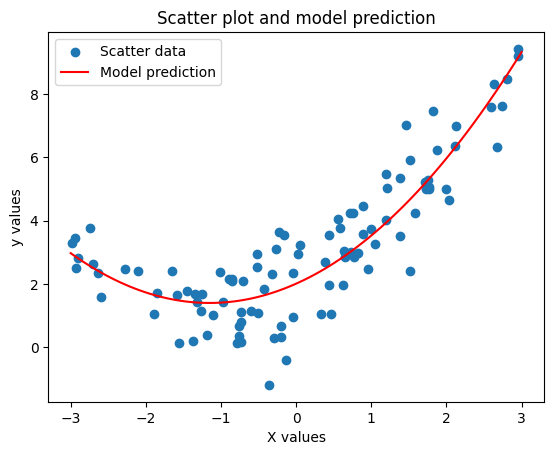

In [27]:
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_poly_plot = poly_features.transform(X_plot)
y_plot = lin_reg.predict(X_poly_plot)

plt.scatter(X, y, label="Scatter data")
plt.plot(X_plot, y_plot, color="red", label="Model prediction")

plt.title("Scatter plot and model prediction")
plt.xlabel("X values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [28]:
### If the model performs well on the training data but generalizes poorly according to the cross validation metrics,
### then the model is overfitting. If it performs poorly on both, then is underfitting. This is one way to tell
### if a model is too simple or too complex.

### Another way to tell is to look at the learning curves: these are plots of the models` perrformance on the
### training set size (or the training iteration). To genearate the plots, train the model several times on different
### sized subsets of the training set. The folllowing code defines a function that, given some training data, plots 
### the learning curve of a model

In [29]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

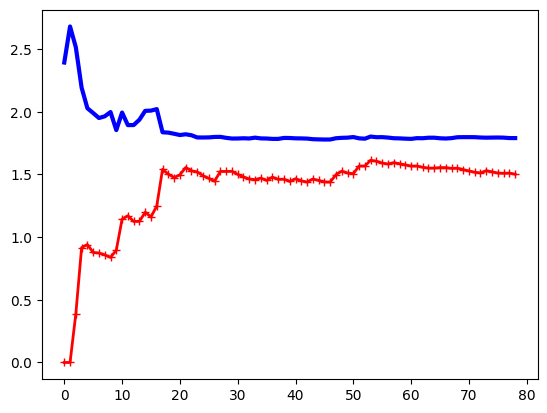

In [30]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [31]:
### The model is most likely under-fittting

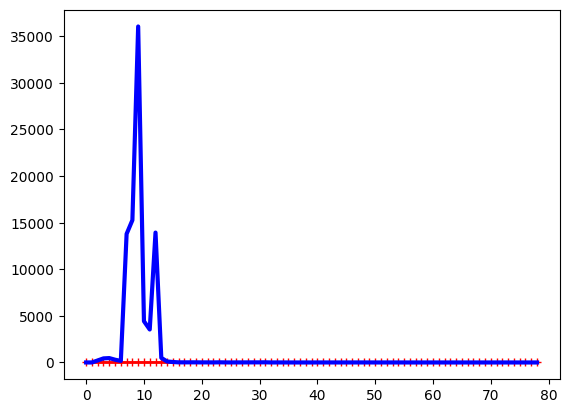

In [32]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In [33]:
### Ridge Regression

In [38]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([4.63090623])

In [39]:
### Lasso Regression

In [41]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.57496247])

In [42]:
### Elastic Net

In [47]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.57492101])